# Load libraries

In [148]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os
import seaborn as sns

#clustering
from sklearn.cluster  import KMeans
from sklearn.metrics import silhouette_score


%matplotlib inline

# Load Data

In [149]:
games_df = pd.read_csv('archive/games.csv')
games_df['GAME_DATE_EST']= pd.to_datetime(games_df['GAME_DATE_EST'])

# Overview of Data

In [150]:
games_df.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2022-12-22,22200477,Final,1610612740,1610612759,2022,1610612740,126.0,0.484,0.926,...,25.0,46.0,1610612759,117.0,0.478,0.815,0.321,23.0,44.0,1
1,2022-12-22,22200478,Final,1610612762,1610612764,2022,1610612762,120.0,0.488,0.952,...,16.0,40.0,1610612764,112.0,0.561,0.765,0.333,20.0,37.0,1
2,2022-12-21,22200466,Final,1610612739,1610612749,2022,1610612739,114.0,0.482,0.786,...,22.0,37.0,1610612749,106.0,0.470,0.682,0.433,20.0,46.0,1
3,2022-12-21,22200467,Final,1610612755,1610612765,2022,1610612755,113.0,0.441,0.909,...,27.0,49.0,1610612765,93.0,0.392,0.735,0.261,15.0,46.0,1
4,2022-12-21,22200468,Final,1610612737,1610612741,2022,1610612737,108.0,0.429,1.000,...,22.0,47.0,1610612741,110.0,0.500,0.773,0.292,20.0,47.0,0


# Data structure 

In [151]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26651 entries, 0 to 26650
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   GAME_DATE_EST     26651 non-null  datetime64[ns]
 1   GAME_ID           26651 non-null  int64         
 2   GAME_STATUS_TEXT  26651 non-null  object        
 3   HOME_TEAM_ID      26651 non-null  int64         
 4   VISITOR_TEAM_ID   26651 non-null  int64         
 5   SEASON            26651 non-null  int64         
 6   TEAM_ID_home      26651 non-null  int64         
 7   PTS_home          26552 non-null  float64       
 8   FG_PCT_home       26552 non-null  float64       
 9   FT_PCT_home       26552 non-null  float64       
 10  FG3_PCT_home      26552 non-null  float64       
 11  AST_home          26552 non-null  float64       
 12  REB_home          26552 non-null  float64       
 13  TEAM_ID_away      26651 non-null  int64         
 14  PTS_away          2655

The data is a pandas DataFrame with 26,651 entries and 21 columns. Overview of the columns:

GAME_DATE_EST: The date of the game. It’s a datetime64[ns] type and has no null values.  
GAME_ID: The ID of the game. It’s an integer type and has no null values.  
GAME_STATUS_TEXT: The status of the game. It’s an object type and has no null values.  
HOME_TEAM_ID: The ID of the home team. It’s an integer type and has no null values.  
VISITOR_TEAM_ID: The ID of the visitor team. It’s an integer type and has no null values.  
SEASON: The season of the game. It’s an integer type and has no null values.  
TEAM_ID_home: The ID of the home team. It’s an integer type and has no null values.  
PTS_home: The points scored by the home team. It’s a float type and has 99 null values.   
FG_PCT_home: The field goal percentage of the home team. It’s a float type and has 99 null values.  
FT_PCT_home: The free throw percentage of the home team. It’s a float type and has 99 null values.  
FG3_PCT_home: The three-point field goal percentage of the home team. It’s a float type and has 99 null values.  
AST_home: The assists by the home team. It’s a float type and has 99 null values.  
REB_home: The rebounds by the home team. It’s a float type and has 99 null values.  
TEAM_ID_away: The ID of the away team. It’s an integer type and has no null values.  
PTS_away: The points scored by the away team. It’s a float type and has 99 null values.  
FG_PCT_away: The field goal percentage of the away team. It’s a float type and has 99 null values.  
FT_PCT_away: The free throw percentage of the away team. It’s a float type and has 99 null values.  
FG3_PCT_away: The three-point field goal percentage of the away team. It’s a float type and has 99 null values.  
AST_away: The assists by the away team. It’s a float type and has 99 null values.  
REB_away: The rebounds by the away team. It’s a float type and has 99 null values.  
HOME_TEAM_WINS: Whether the home team wins or not. It’s an integer type and has no null values.  

# Missing values 
Missing values were droped using th e drop_na function. 

In [152]:
print('There are {} missing values or NaNs in games_df.'
      .format(games_df.isnull().values.sum()))

There are 1188 missing values or NaNs in games_df.


In [153]:
games_df = games_df.dropna()

# To reset the index
games_df = games_df.reset_index(drop=True)

# Select variables 

In [154]:
games_df= games_df[['PTS_home','FG_PCT_home', 'FT_PCT_home', 
          'FG3_PCT_home', 'AST_home', 'REB_home', 
          'PTS_away', 'FG_PCT_away', 'FT_PCT_away', 
          'FG3_PCT_away', 'AST_away','REB_away', 
          'HOME_TEAM_WINS']]

# Desctiptive statistics 

In [155]:
games_df.describe()

,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
count,26552.000000,26552.000000,26552.000000,26552.000000,26552.000000,26552.000000,26552.000000,26552.000000,26552.000000,26552.000000,26552.000000,26552.000000,26552.000000
mean,103.455898,0.460735,0.760377,0.356023,22.823441,43.374284,100.639876,0.449732,0.758816,0.349489,21.496271,42.113249,0.589221
std,13.283370,0.056676,0.100677,0.111164,5.193308,6.625769,13.435868,0.055551,0.103429,0.109441,5.160596,6.533039,0.491984
min,36.000000,0.250000,0.143000,0.000000,6.000000,15.000000,33.000000,0.244000,0.143000,0.000000,4.000000,19.000000,0.000000
25%,94.000000,0.422000,0.697000,0.286000,19.000000,39.000000,91.000000,0.412000,0.692000,0.278000,18.000000,38.000000,0.000000
50%,103.000000,0.460000,0.765000,0.357000,23.000000,43.000000,100.000000,0.449000,0.765000,0.350000,21.000000,42.000000,1.000000
75%,112.000000,0.500000,0.833000,0.429000,26.000000,48.000000,110.000000,0.487000,0.833000,0.419000,25.000000,46.000000,1.000000
max,168.000000,0.684000,1.000000,1.000000,50.000000,72.000000,168.000000,0.687000,1.000000,1.000000,46.000000,81.000000,1.000000


 The average points scored by the home team is approximately 103.46, with a standard deviation of about 13.28, indicating variability in the scores. The points range from a minimum of 36 to a maximum of 168. The first quartile (25% of games) have the home team scoring 94 points or less, while in half of the games, the home team scores 103 points or less. In 75% of the games, the home team scores 112 points or less. Similar statistical distributions are observed for other game statistics like field goal percentages, assists, and rebounds for both home and away teams. Summary statistics provide a comprehensive summary of the dataset, useful for further analysis such as identifying patterns, understanding variability, and spotting potential outliers.

# Data Distribution of key variables 

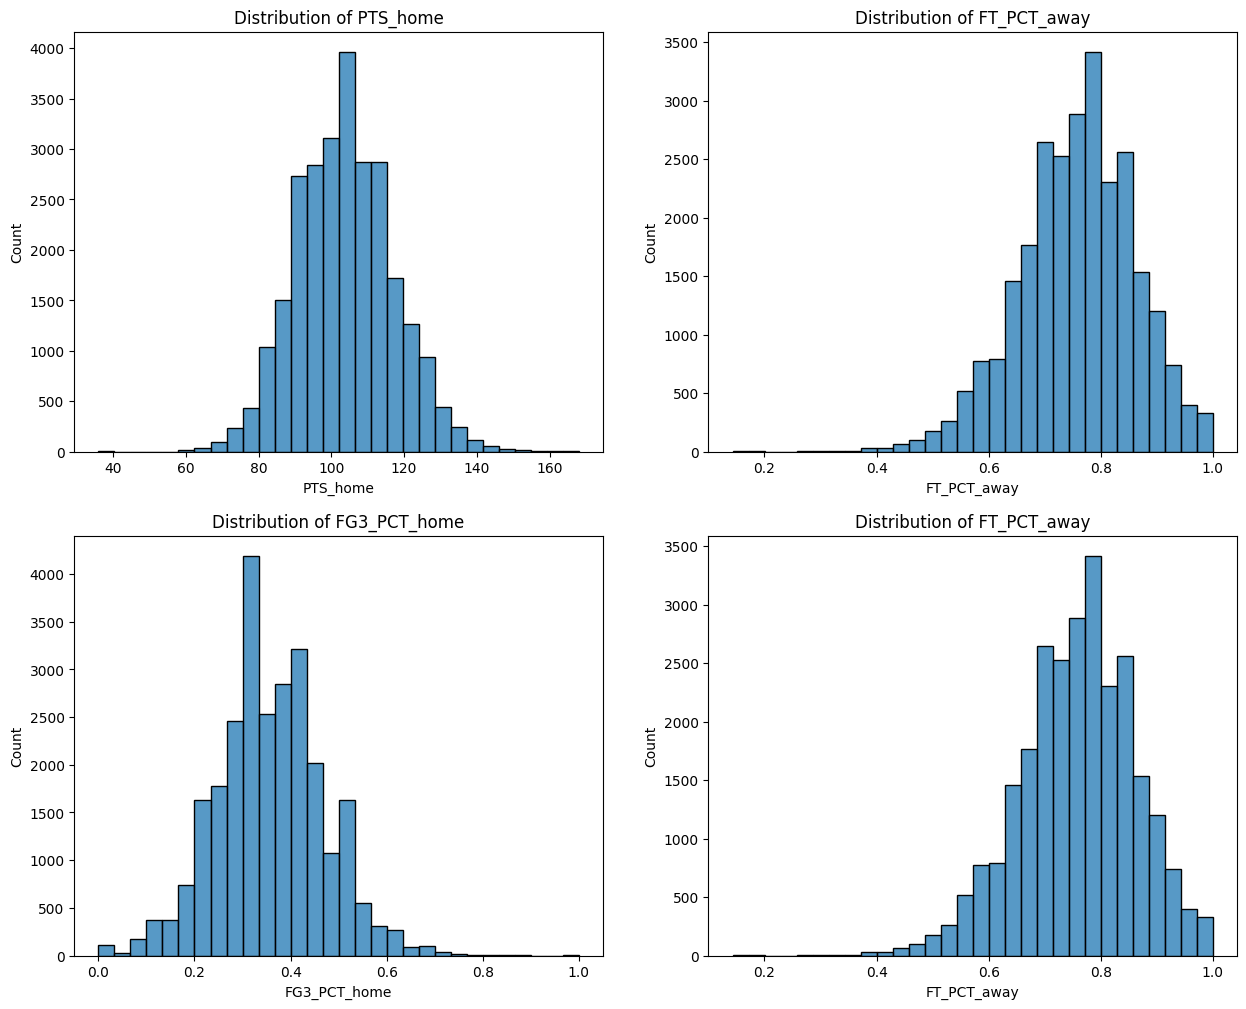

In [156]:

# Plotting distributions of key numerical variables
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

sns.histplot(games_df['PTS_home'], bins=30, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of PTS_home')

sns.histplot(games_df['FT_PCT_away'], bins=30, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of FT_PCT_away')

sns.histplot(games_df['FG3_PCT_home'], bins=30, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of FG3_PCT_home')

sns.histplot(games_df['FT_PCT_away'], bins=30, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of FT_PCT_away')

# sns.histplot(data['sea_level_pressure'], bins=30, ax=axes[2, 0])
# axes[2, 0].set_title('Distribution of Sea Level Pressure')

#plt.xlabel("")
plt.show()

All the 4 variebles show that the data follows a normal disribution with  centered means. 

# Insights from the data

In [157]:
pct_home_win = games_df['HOME_TEAM_WINS'].value_counts()/len(games_df) * 100
print(f'Teams are likely to win {pct_home_win[1]:.2f}% during home games, and lose {pct_home_win[0]:.2f}% during home games')

Teams are likely to win 58.92% during home games, and lose 41.08% during home games


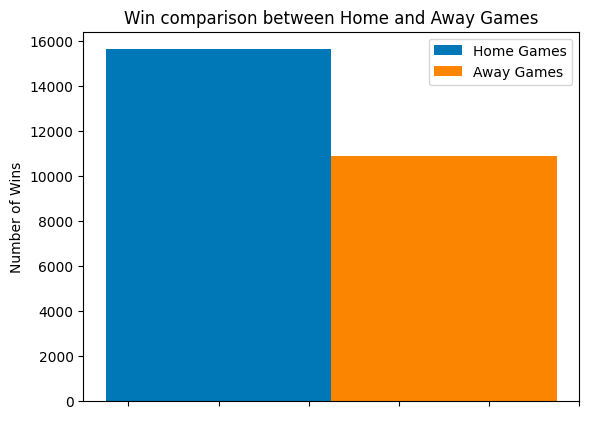

In [158]:

win_filt= games_df[games_df["HOME_TEAM_WINS"]==1]
lose_filt= games_df[games_df["HOME_TEAM_WINS"]==0]
x = win_filt['HOME_TEAM_WINS'].value_counts()
y = lose_filt['HOME_TEAM_WINS'].value_counts()

ti = [0.5]
hor = np.arange(len(ti))

plt.bar(ti,x,width = 0.25,color = '#0077b6',label = 'Home Games')
plt.bar(hor + 0.75,y,width = 0.25,color = '#fb8500',label = 'Away Games')

plt.ylabel('Number of Wins')
plt.xticks(color = 'w')
plt.title('Win comparison between Home and Away Games')
plt.legend()

The graph shows that the posibilities of a team winnig home game is greater than that of winning away games. We can further breake the wins though key conributors. 

In [159]:
def get_mean(group, column):
    return group[column].mean()
def get_2mean(df,first,second):
    return (df[first]/df[second]).mean()
def get_2median(df,first,second):
    return (df[first]/df[second]).median()

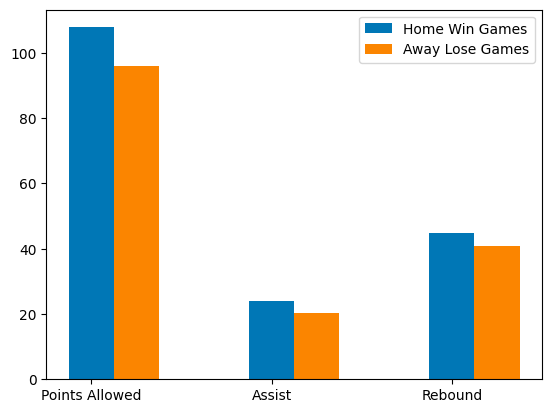

In [160]:
x = [get_mean(win_filt,'PTS_home'),get_mean(win_filt,'AST_home'),
     get_mean(win_filt,'REB_home')]
y = [get_mean(win_filt,'PTS_away'),get_mean(win_filt,'AST_away'),
     get_mean(win_filt,'REB_away')]

ti = ['Points Allowed','Assist','Rebound']
hor = np.arange(len(ti))

plt.bar(ti,x,width = 0.25,color = '#0077b6',label = 'Home Win Games')
plt.bar(hor + 0.25,y,width = 0.25,color = '#fb8500',label = 'Away Lose Games')
plt.legend()

The home team, when winning, allowed more points than the away team did when losing. The home team, when winning, had more assists than the away team when losing. This suggests that the home team had better teamwork or ball movement in their winning games.The home team, when winning, had fewer rebounds than the away team when losing. 

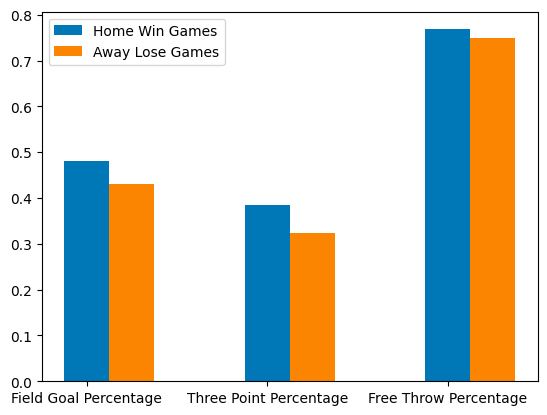

In [161]:
# plotting using the bar graph the difference between the fg pct and 3pt fg pct of home and away games
x = [get_mean(win_filt,'FG_PCT_home'),get_mean(win_filt,'FG3_PCT_home'),
    get_mean(win_filt,'FT_PCT_home')]
y = [get_mean(win_filt,'FG_PCT_away'),get_mean(win_filt,'FG3_PCT_away'),
    get_mean(win_filt,'FT_PCT_away')]
ti = ['Field Goal Percentage','Three Point Percentage','Free Throw Percentage']
hor = np.arange(len(ti))

plt.bar(ti,x,width = 0.25,color = '#0077b6',label = 'Home Win Games')
plt.bar(hor + 0.25,y,width = 0.25,color = '#fb8500',label = 'Away Lose Games')
plt.legend()

The provided bar graph offers a comparative analysis, focusing on home win games and away lose games. The key shooting statistics under consideration are field goal percentage, three-point percentage, and free throw percentage. Home teams show a better perfomance in all three aspects. 

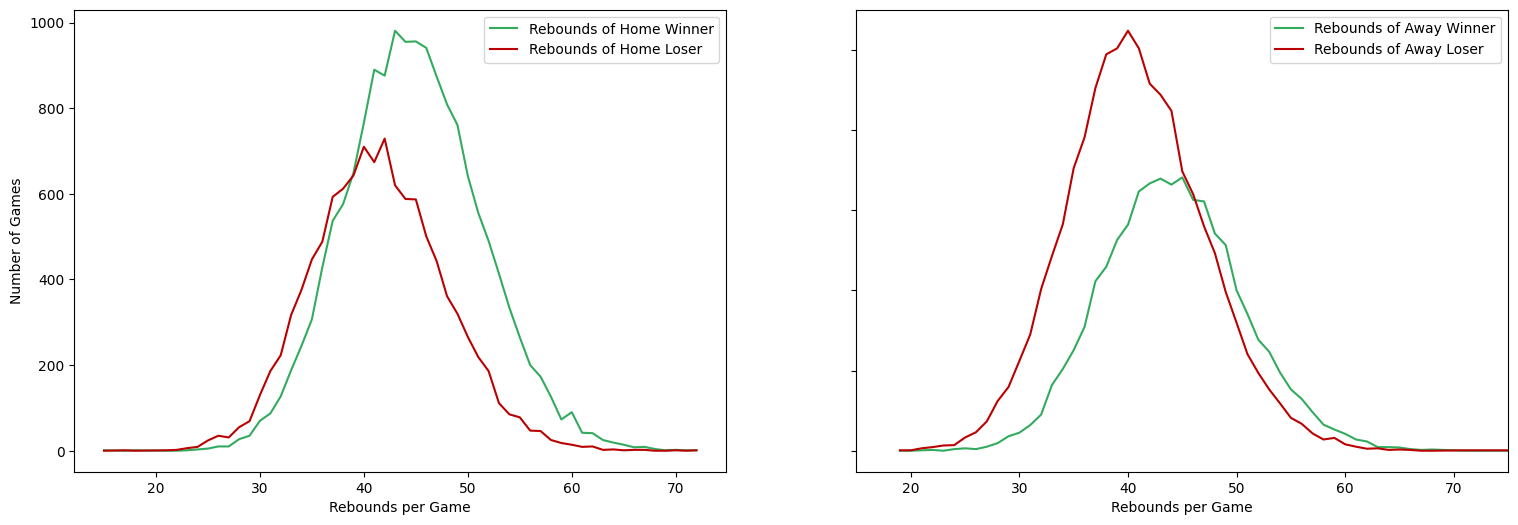

In [162]:
# compare it with rebounds of loser and winner
reb_grp = games_df.groupby(['REB_home','HOME_TEAM_WINS'])
reb_table = reb_grp.size().unstack(fill_value=0)

# assigning the amount of rebounds the winner and loser has
plt.subplot(1,2,1)
plt.plot(reb_table[1], color = '#33AB5F',label = 'Rebounds of Home Winner')
plt.plot(reb_table[0], color = '#BA0001',label = 'Rebounds of Home Loser')

plt.ylabel('Number of Games')
plt.xlabel('Rebounds per Game')
plt.legend()

# compare the results from those who won and lost during home and away games
plt.subplot(1,2,2)
losereb_grp = games_df.groupby(['REB_away','HOME_TEAM_WINS'])
losereb_table = losereb_grp.size().unstack(fill_value=0)

plt.plot(losereb_table[0], color = '#33AB5F',label = 'Rebounds of Away Winner')
plt.plot(losereb_table[1], color = '#BA0001',label = 'Rebounds of Away Loser')

plt.yticks(c='w')
plt.xlim([15,75])
fig = plt.gcf()
fig.set_size_inches(18.5,6)
plt.xlabel('Rebounds per Game')
plt.legend()

The first graph (on the left) shows that teams who get more rebounds usually win. On average, the winning home team gets 44 rebounds per game, while the losing home team gets 41.4 rebounds.

The second graph (on the right) indicates that teams with fewer rebounds tend to lose when they play away. The winning team in away games averages 44 rebounds per game, while the losing team gets 40.7 rebounds.

# Correlation 


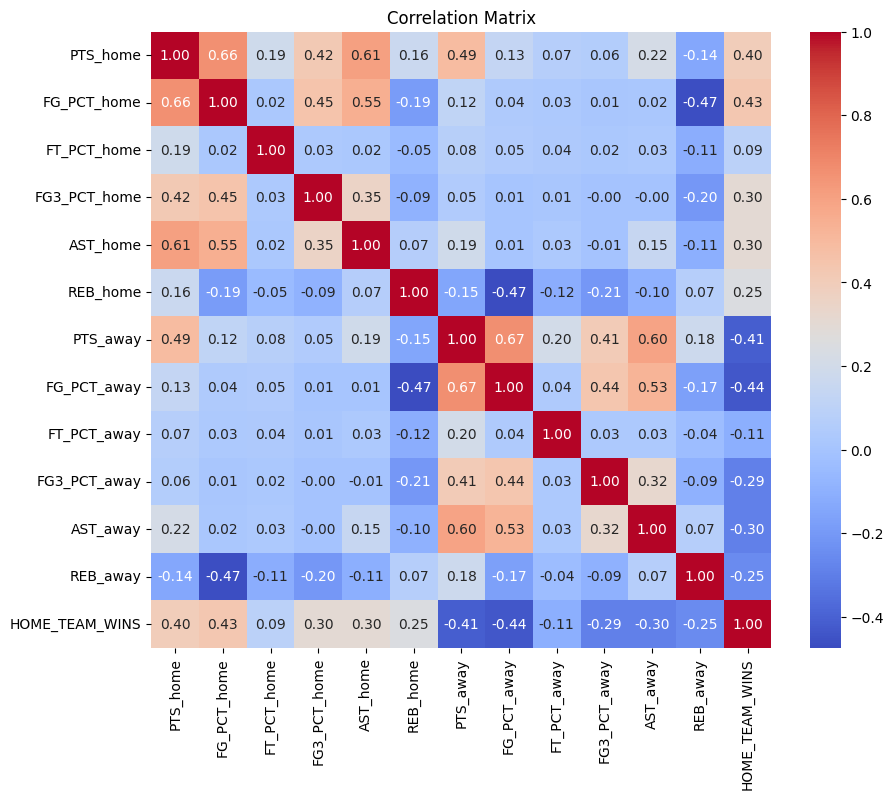

In [163]:
# Correlation Matrix
corr_matrix = games_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
#plt.xlabel("")
plt.show()

#corr_matrix

The correlation matrix for a basketball game shows several relationships. Home teams that score more points, have a higher field goal percentage, or make more assists are more likely to win. However, if they have more rebounds, they tend to have a lower field goal percentage. Similarly, away teams that score more points, have a higher field goal percentage, or make more assists are more likely to win. But, if they have more rebounds, they tend to have a lower field goal percentage.

# Machine Learning 
# Clustering model

## Team Performance Analysis

By clustering game data (like team shooting percentage, turnovers, etc.), we can identify patterns in team performance. This can provide insights into the effectiveness of different team strategies

## Visualize the data 

<Axes: xlabel='PTS_home', ylabel='PTS_away'>

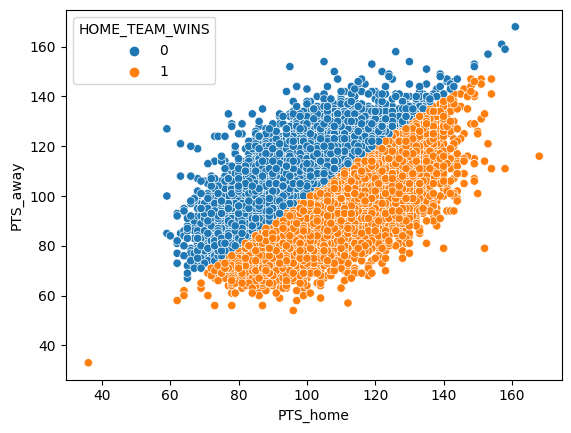

In [164]:
sns.scatterplot(data = games_df, x = 'PTS_home', y = 'PTS_away', hue = 'HOME_TEAM_WINS')

In [165]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(games_df.drop(['HOME_TEAM_WINS'] , axis=1),
                                                     games_df[['HOME_TEAM_WINS']], test_size=0.33, random_state=0)

## Normalize
Next, we normalize the training and test data using the preprocessing.normalize() method

In [166]:
from sklearn import preprocessing

X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

# Choosing the best number of clusters

In [167]:
K = range(2, 8)
fits = []
score = []


for k in K:
    # train the model for current value of k on training data
    model = KMeans(n_clusters = k, random_state = 0, n_init='auto').fit(X_train_norm)
    
    # append the model to fits
    fits.append(model)
    
    # Append the silhouette score to scores
    score.append(silhouette_score(X_train_norm, model.labels_, metric='euclidean'))



Choose the value of k by using an elbow plot where the y-axis is a measure of goodness of fit and the x-axis is the value of k

<Axes: >

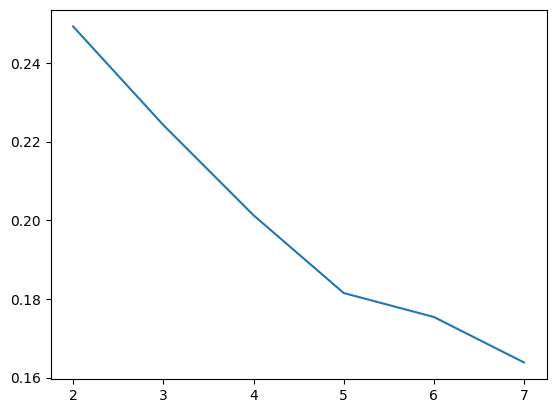

In [168]:
sns.lineplot(x = K, y = score)

<Axes: xlabel='PTS_home', ylabel='PTS_away'>

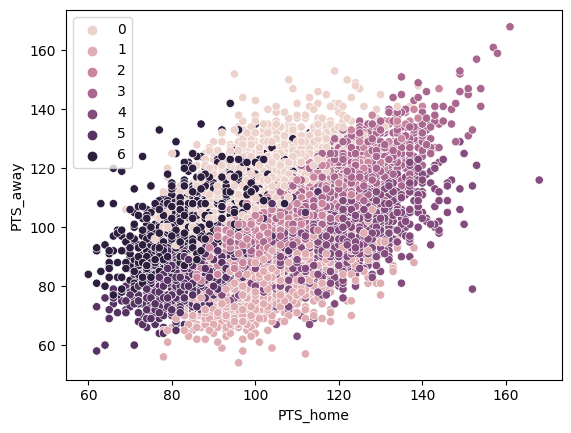

In [169]:
sns.scatterplot(data = X_train, x = 'PTS_home', y = 'PTS_away', hue = fits[5].labels_)

# Classification Models 

In [170]:
# import the metrics class
from sklearn import metrics
# import the class
from sklearn.linear_model import LogisticRegression

In [171]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

/home/ricmwas/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


/home/ricmwas/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Accuracy Logistic Regression

In [172]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


# Confusion Matric Logistic Regression

Text(0.5, 427.9555555555555, 'Predicted label')

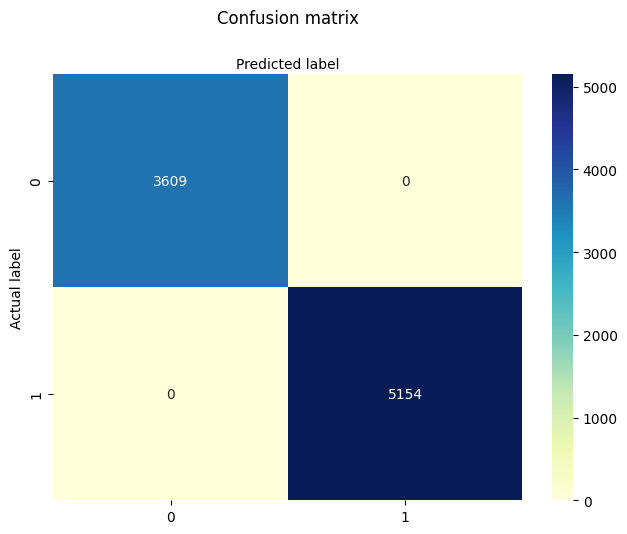

In [173]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)


class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# ROC CURVE Logistic Regression 

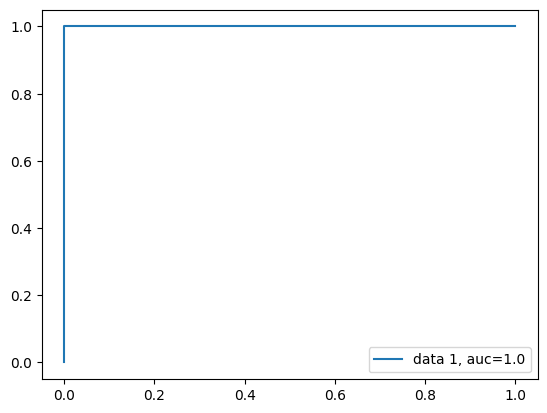

In [174]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Decision Tree

In [175]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred2 = clf.predict(X_test)


# Accuracy Decision Tree

In [176]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred2))


Accuracy: 0.9952071208490243


# Confusion matrix Decision Tree

Text(0.5, 427.9555555555555, 'Predicted label')

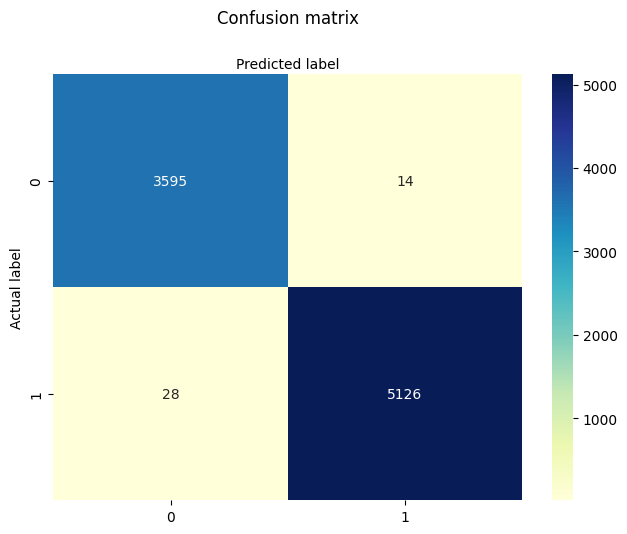

In [177]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred2)


class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# ROC Curve Decision Tree

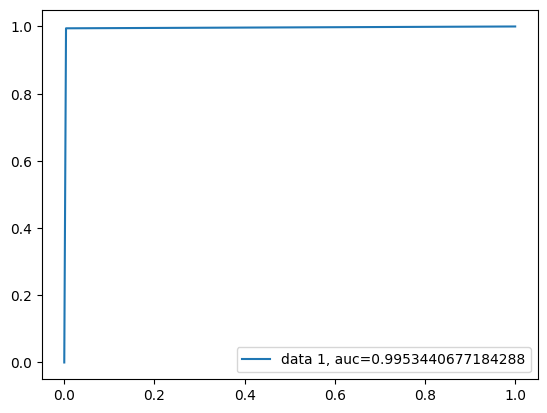

In [178]:
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Comapring the tow classification models, Logistic regresstion performed better in predicting the wining team with 100 % accuracy as cpmapred to decision tree whic had 99% accauracy. 